In [1]:
import pandas as pd
import joblib

In [2]:
df = pd.read_excel("data/tweet_bersih_100.xlsx") #data latih yang digunakan tweet_bersih_100.xlsx
twet = df.tweet.tolist()
label = df.label.tolist()
df.head() #menampilkan lima teraatas dari data bersih

,tweet,label
0,buka visi misi begitu pukau sehingga buat pres...,positive
1,lebih baik pakai teknologi lama kaya negara in...,positive
2,kok arguing without menang,positive
3,jalan politik politik satu bukan politik pecah...,positive
4,juga fans lihat tampil serang hahaha,negative


positive    500
negative    500
Name: label, dtype: int64


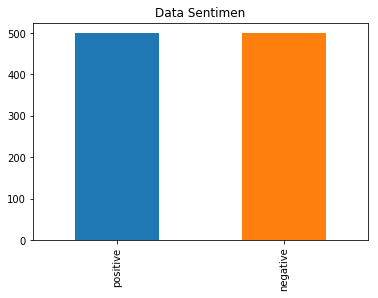

In [4]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

# Pembagian data & pemodelan

In [5]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = twet
vectorizer = TfidfVectorizer()
save = vectorizer.fit(corpus)
joblib.dump(save,"model/tdidf.w")
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names())#jumlah line fitur

2374

In [7]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k) #membuat model kfold sejumlah k
kf.get_n_splits(X)
# print(kf)
alpah_list = np.arange(0.1, 1+0.001, 0.001)
rerata = list()
for alpha in alpah_list:
    clf = MultinomialNB(alpha = alpha)
    sc_10 = list()
    for train_index, test_index in kf.split(X):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        sc = clf.score(X_test, y_test)
        sc_10.append(sc)
#     print( sum(sc_10)/k, "|", alpha)
    rerata.append(sum(sc_10)/k)
dict_ = {
    "alpha":alpah_list,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head()

,alpha,score
208,0.308,0.774
204,0.304,0.774
206,0.306,0.774
207,0.307,0.774
209,0.309,0.774


In [8]:
sorted_.alpha.tolist()[0]

0.30800000000000016

In [9]:
clf = MultinomialNB(alpha = sorted_.alpha.tolist()[0])
save = clf.fit(X, y) 
joblib.dump(save,"model/naive_bayes.m")

['model/naive_bayes.m']

In [10]:
save.score(X, y)

0.946

In [11]:
x = save.predict(X)

In [12]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1

7
negative
label asli positive
apa bilang pak memang benar mau bukti di ejek asing v i r a l k a n prabow

10
negative
label asli positive
bidang hubung internasional anut prinsip kawan terlalu sedikit musuh terlalu banyak prabowo

38
negative
label asli positive
si bilang bela pancasila dukung curut khilafah hti juga tidak hapal pancasila

52
negative
label asli positive
duh pak baik banget kalau bicara bahasa inggris arti tahu kalau pak tidak bahasa inggris

82
negative
label asli positive
sorot debatpilpres 2019 kali presiden sangat jelas masa kini masa depan realita solusi masalah

99
positive
label asli negative
tuju sekali pak selesai soal korupsi memang benah sistem bisa potong rantai

109
negative
label asli positive
optimisindonesiamaju kalau tetap percaya sama orang walau sering tuduh itu hehe

115
negative
label asli positive
kalau mau jadi nice guy jadi mediator monggo kalau juang indonesia hormat indonesia kuat

119
negative
label asli positive
bukan tidak percaya tni ini 